Back Propagation
- beginning with an simple example where we just seek to minimize the output of a single neuron
- goal is to figure out how much each input, weight, and bias impacts the neuron function (and eventually then network)
- to do this need to use the chain rule and take the derivative with respect to each input, weight, bias (only 1 bias here)
- only use derivative with respect to weights and biases to minimize loss, but need to know derivatives with respect to inputs as well because it is used to chain to another layer (more understanding in next bullet point)
- we are chaining the layers together via the input derivative so like derivative of each layer with respect to its input, but then on the last layer or the layer we are interested in calculating the derivative for, take the derivative of that layer with respect to weight or bias. Cause the change in the weight or bias ultimately is the ultimate input to that next layer, so it will transform that layer's input. dfunction/dweight = dlayer2(layer1output)/dlayer1 * dlayer1/dx; so its really the same thing as the chain rule, and as part of the chain rule, need to know the derivative of the outer function wih respect to its input, which is the inner function, then can take the derivative of inner function with respect to whatever parameter you want, in this case weight or bias. So the input is acting as the chain (the chain rule!)

Back Prop on 1 Neuron
- Example Neuron function where x0, w0 are inputs and respective weight, b is bias: y = relu(w0 * x0 + w1 * x1 + w2 *x2 + b) = max(w0 * x0 + w1 * x1 + w2 *x2 + b, 0)
- can be broken down even further into considering each weight* input is own function; the book does this. See function, were sum() is the sum of the weights* inputs and bias, and mul() is weights* inputs. So derivative of full neuron with respect to x0 would be deriv from next layer wrt input * dReLU()/dsum() * dsum()/dmul() * dmul()/dx0

In [1]:
# Forward pass
x = [1.0, -2.0, 3.0] # input values
w = [-3.0, -1.0, 2.0] # weights
b = 1.0 # bias
# Multiplying inputs by weights
xw0 = x[0] * w[0]
xw1 = x[1] * w[1]
xw2 = x[2] * w[2]
# Adding weighted inputs and a bias
z = xw0 + xw1 + xw2 + b
# ReLU activation function
y = max(z, 0)
# Backward pass
# The derivative from the next layer
dvalue = 1.0

''' Example of how this comes together
dtwoneurons/dx0 = dnext_layer/dReLU * dReLu/dsum() * dsum()/dmul() * dmul/dx0
'''

# Derivative of ReLU and the chain rule
drelu_dz = dvalue * (1. if z > 0 else 0.)
print("Next Layer times Relu:", drelu_dz)

# Partial derivatives of the multiplication, the chain rule, deriv of plain sum is just 1 (think about it)
dsum_dxw0 = 1
dsum_dxw1 = 1
dsum_dxw2 = 1
dsum_db = 1
drelu_dxw0 = drelu_dz * dsum_dxw0
drelu_dxw1 = drelu_dz * dsum_dxw1
drelu_dxw2 = drelu_dz * dsum_dxw2
drelu_db = drelu_dz * dsum_db
print("Next Layer, RelU, and sum for each sum and bias:", drelu_dxw0, drelu_dxw1, drelu_dxw2, drelu_db)
# Partial derivatives of the multiplication, the chain rule
#short cut to derivative here is that the deriv wrt to weight is just input value and wrt to input is just the weight (flip-flop)
dmul_dx0 = w[0] 
dmul_dx1 = w[1]
dmul_dx2 = w[2]
dmul_dw0 = x[0]
dmul_dw1 = x[1]
dmul_dw2 = x[2]
drelu_dx0 = drelu_dxw0 * dmul_dx0
drelu_dw0 = drelu_dxw0 * dmul_dw0
drelu_dx1 = drelu_dxw1 * dmul_dx1
drelu_dw1 = drelu_dxw1 * dmul_dw1
drelu_dx2 = drelu_dxw2 * dmul_dx2
drelu_dw2 = drelu_dxw2 * dmul_dw2

#note that the full deriv wrt to bias is calculated above it is 1, since it is just a sum onto the sum function
print("Full wrt inputs, weights:",drelu_dx0, drelu_dw0, drelu_dx1, drelu_dw1, drelu_dx2, drelu_dw2)

Next Layer times Relu: 1.0
Next Layer, RelU, and sum: 1.0 1.0 1.0 1.0
Full wrt inputs, weights: -3.0 1.0 -1.0 -2.0 2.0 3.0


Ultimately Simplifying the Code Above
- taking out all multplying by 1 etc. just leaves you with derivative of next_layer * ReLu * w0 (or x0, bias, etc)

In [7]:
# Forward pass
x = [1.0, -2.0, 3.0] # input values
w = [-3.0, -1.0, 2.0] # weights
b = 1.0 # bias
# Multiplying inputs by weights
xw0 = x[0] * w[0]
xw1 = x[1] * w[1]
xw2 = x[2] * w[2]
# Adding weighted inputs and a bias
z = xw0 + xw1 + xw2 + b
# ReLU activation function
y = max(z, 0)
# Backward pass
# The derivative from the next layer
dvalue = 1.0

''' Example of how this comes together
dtwoneurons/dx0 = dnext_layer/dReLU * dReLu/dsum() * dsum()/dmul() * dmul/dx0

z = sum() + b

now simplified to dnext_layer/dReLU * dReLu/dz * dz/dx[0]
'''

# Derivative of ReLU and the chain rule
drelu_dz = dvalue * (1. if z > 0 else 0.)
print("Next Layer times Relu:", drelu_dz)

# Partial derivatives of the multiplication, the chain rule
#short cut to derivative here is that the deriv wrt to weight is just input value and wrt to input is just the weight (flip-flop)

drelu_dx0 = dvalue * (1. if z > 0 else 0.) * w[0]
drelu_dw0 = dvalue * (1. if z > 0 else 0.) * x[0]
drelu_dx1 = dvalue * (1. if z > 0 else 0.) * w[1]
drelu_dw1 = dvalue * (1. if z > 0 else 0.) * x[1]
drelu_dx2 = dvalue * (1. if z > 0 else 0.) * w[2]
drelu_dw2 = dvalue * (1. if z > 0 else 0.) * x[2]
drelu_db = dvalue * (1. if z > 0 else 0.) * 1
print("Full wrt inputs, weights:",drelu_dx0, drelu_dw0, drelu_dx1, drelu_dw1, drelu_dx2, drelu_dw2)
print("wrt bias", drelu_db)

Next Layer times Relu: 1.0
Full wrt inputs, weights: -3.0 1.0 -1.0 -2.0 2.0 3.0
wrt bias 1.0


Decreasing the output of neuron (manually); run cell above for gradient values

In [8]:
dx = [drelu_dx0, drelu_dx1, drelu_dx2] # gradients on inputs
dw = [drelu_dw0, drelu_dw1, drelu_dw2] # gradients on weights
db = drelu_db # gradient on bias...just 1 bias here

#current weights and bias
print("Current Weights", w, b)

#applying a small negative value to our gradient to respect to weight, ie. how much the final output changes wrt to change in weights
#negative because we want to decrease the output of neuron
w[0] += -0.001 * dw[0]
w[1] += -0.001 * dw[1]
w[2] += -0.001 * dw[2]
b += -0.001 * db

#new weight and bias
print("New weights", w, b)

# Multiplying inputs by new weights
xw0 = x[0] * w[0]
xw1 = x[1] * w[1]
xw2 = x[2] * w[2]

# Adding
z = xw0 + xw1 + xw2 + b
# ReLU activation function
y = max(z, 0)
print("New Output", y, "Old Output", 6)


Current Weights [-3.0, -1.0, 2.0] 1.0
New weights [-3.001, -0.998, 1.997] 0.999
New Output 5.985 Old Output 6


So basically gradient descent is this, which much of this insight came from reading outside the book:
- find how much each weight impacts the loss/target function (derivative wrt weight aka gradient)
- multiply that impact by a small constant amount across impacts (gradients) => so weights that have larger gradients will result in larger values, smaller gradients will result in smaller values (e.g., .001 * 1 < .001 * 2)
- subtract that amount from the current weight value. Subtract because we are trying to minimize. Weights with larger impacts on function output (e.g., larger gradient) will decrease by more whereas ones with smaller gradients will decrease less
- In other words: you are changing the weights that have the most impact by more than less impactful ones, thus "moving in the steepest direction" (as all the blogs say) because are changing the most impactful parameters by greater values. Adding/Subtracting a slope times some constant back to the slope so the steeper the slope (bigger gradient), the greater value you are adding/subtracting back to the slope(gradient), changing the slope by more than if it was less steep.
- as the gradients decrease, then you make overall smaller changes to weights, so effectively taking smaller steps, the closer you get to optimizing the function at the minimum (gradients approaching zero)
- changing the weights while holding input constant => by doing the above to change the most impactful weights by more to more quickly reduce the loss function

This was the basic process of minimizing the output of a neuron, in reality want to minimize the loss of a network. The next layer aspect of this is kind of ingnored (it is 1), although if you include the next layer wouldn't we really be minimizing the value of the next layer?

Backpropagation Between Layers
- so in a layer, each nueron outputs a gradient with respect to each input
- the sum of the gradients for each respective input is the full derivative for that input. This leverages the principle that derivatives sum linearly. So partial derivative for input 1 across 3 neurons can sum togther for full derivative of input 1 for the whole layer => gained this insight thru additional reading outside the book
- So here can just sum weights of each neuron that correspond to each respective input (excluding any other chain rule stuff from previous layer, otherwise need to multiply these first per chain rule) => this is the the shortcut approach.

Backpropagation Between Layers
- Note: did not find the book explanation particularly clear, so the following is my interpretation of it
- just like on the forward pass, each nueron is outputting a gradient with respect to inputs, on the backward pass, each following layer has a gradient with respect to the layer before it (i.e., previous layer occurs earlier in forward pass). To continue backpropagation/chain rule, need to calculate the full derivative of each of the previous layer's neurons to backpropagate through them. This is done by summing the following layer's partial derivatives with respect to that inputting neuron. Can do this because you can add derivatives (i.e. derivative of x + x + x is the same as 3x), in other words, partial derivatives wrt to same variable sum linearly/are additive.
- Example: for neuron A in the current layer, all neurons in the following layer have a partial derivative associated with neuron A in the current layer. To do the chain rule and backpropagate through neuron A in the current layer, need to know the full derivative (i.e., not just partial) with respect to neuron A. A derivative is additive and the sum of the partial derivative (as seen in earlier chapters). Thus to get the full derivative wrt to neuron A's output, need to sum partial derivatives wrt to A' output of each of the following layer neurons.
- a good visual metaphor is like bundling a bunch of frayed wires (partial derivatives) together into 1 big cable (full derivative)
- so, given a following, current, and input layer: to get the partial derivatives wrt to an input layer neuron, need to do the chain rule etc. So multiply the following layer's derivative by the derivative wrt weight of the input neuron's output (aka just the input). This would be the weight that a current layer's neuron has on an input layer's neuron. This multiplication gives you the partial derivative wrt to that input neuron for a given current neuron. Repeat this for each neuron in the current layer and sum. This then gives you the full derivative wrt to that input neuron, which you can use to continue backpropagating thru the network. Repeat for all neurons in the layers.
- (ignore if you are confused) basically you are calculating gradient wrt to the inputs of the layer, so each full derivative wrt to 1 input is part of a larger gradient of each of the input neurons output values 

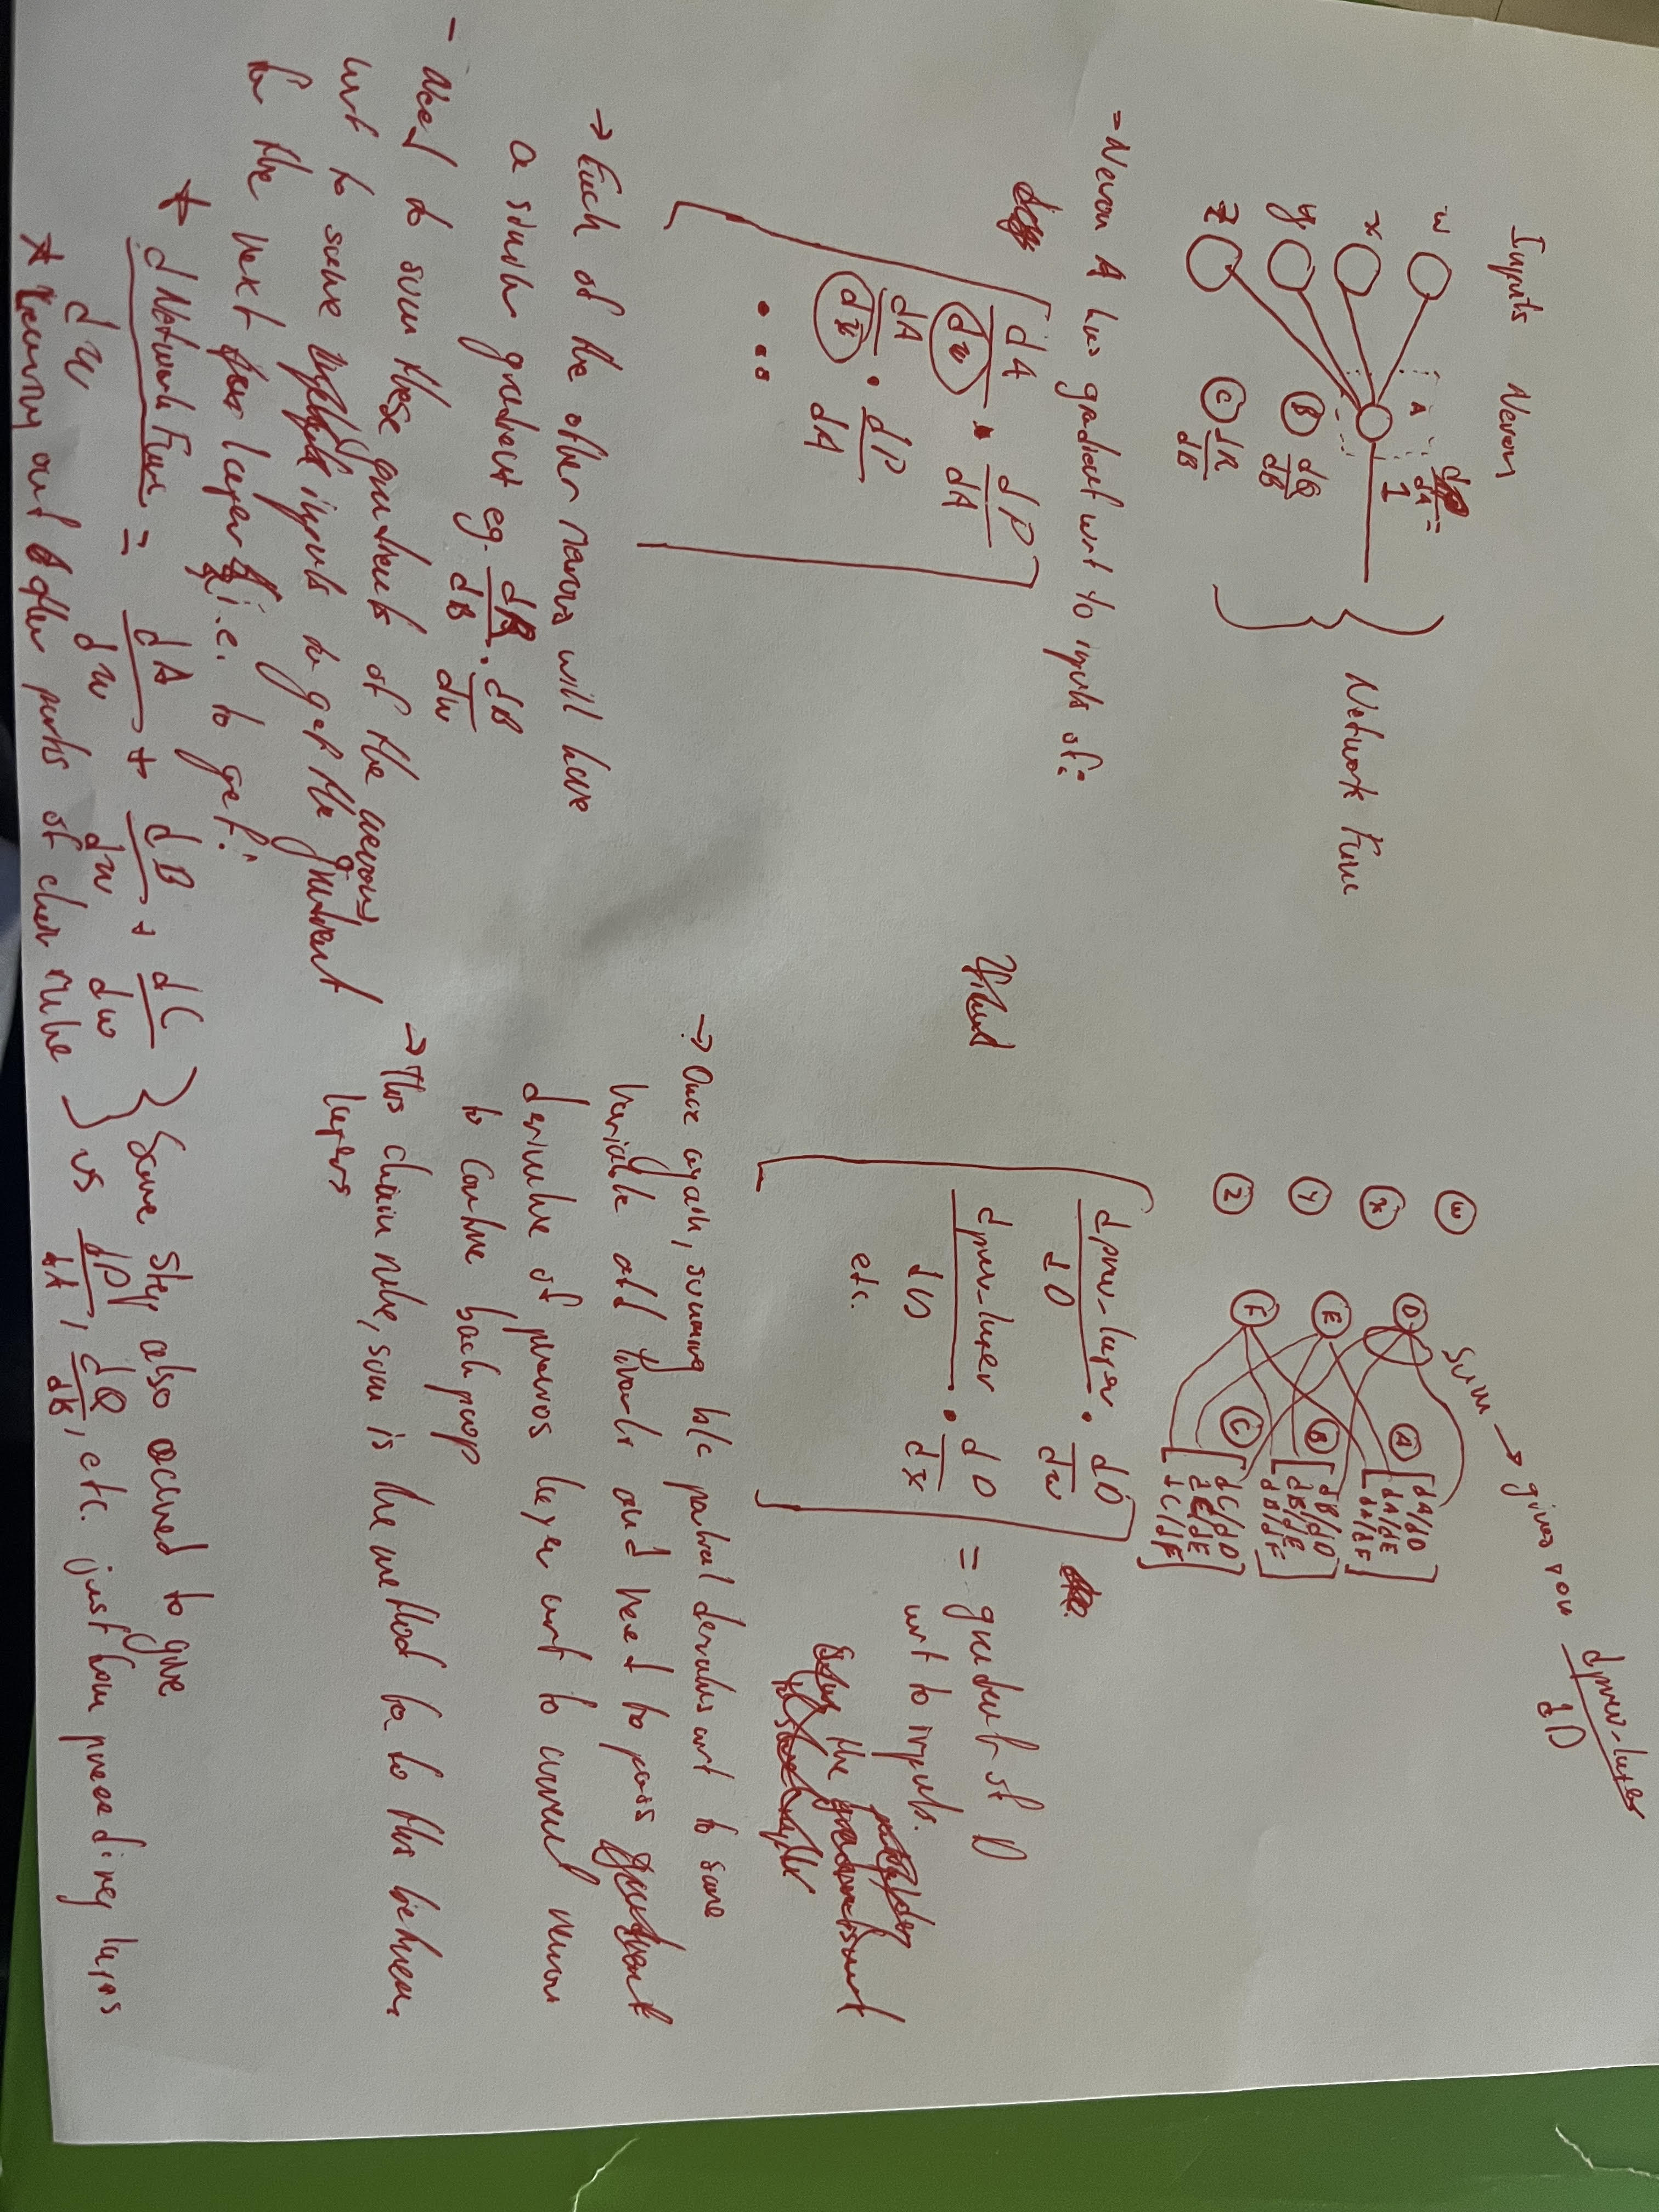

Overview of Example from Book
- imagine a layer of 3 neurons that have 4 inputs each (so 4 weights each). There are layers that follow the 3 layers, but these are not shown
- we want to get the gradient of the function with respect to each of the 4 inputs. So we need the partial derivative of the function wrt to each of the inputs, aka need to take the derivative of the function wrt to each input
- the layer of the 3 recives a gradient from the rest of the greater function , where each partial derivative is the derivative wrt each neuron's in the layer of 3's output. 
- so each of these partial derivatives is passed to its respective neuron in the layer of 3 to continue the chain rule.
- the partial derivative is multiplied by the respective neuron weights (if taking deriv wrt to input), which results in each neuron have a gradient for each input
- sum each neuron's partial derivative wrt to the same input to get the full derivative wrt to that input (explained above). That full derivative is a partial derivative to the larger gradient funtion of that layer
- presumably this is also how we got the input gradient to the layer of 3 as well


- nuance of the example is that the weight matrix is transposed because we have it naturally transposed (ie. it is defined transposed rather than being .T) in the actual layer objects.
- using shortcut of derivative wrt input is weight


In [1]:
import numpy as np

# Passed-in gradient from the next layer
# for the purpose of this example we're going to use
# a vector of 1s
dvalues = np.array([[1., 1., 1.]])
# We have 3 sets of weights - one set for each neuron
# we have 4 inputs, thus 4 weights
# recall that we keep weights transposed
weights = np.array([[0.2, 0.8, -0.5, 1],
                    [0.5, -0.91, 0.26, -0.5],
                    [-0.26, -0.27, 0.17, 0.87]]).T

# Sum weights related to the given input multiplied by
# the gradient related to the given neuron
dx0 = sum([weights[0][0]*dvalues[0][0], weights[0][1]*dvalues[0][1],weights[0][2]*dvalues[0][2]])
dx1 = sum([weights[1][0]*dvalues[0][0], weights[1][1]*dvalues[0][1],weights[1][2]*dvalues[0][2]])
dx2 = sum([weights[2][0]*dvalues[0][0], weights[2][1]*dvalues[0][1],weights[2][2]*dvalues[0][2]])
dx3 = sum([weights[3][0]*dvalues[0][0], weights[3][1]*dvalues[0][1],weights[3][2]*dvalues[0][2]])
#note that because the weights are transposed, the dvalues are only multiplied by their respective neuron
#this is as should be, so dvalues[0][2], the third item in dvalues is always multiplied by the third item of the row in the transposed matrix
# aka the third dvalue is only multiplied by third neuron weights (the 3rd row in untransposed)

#gradient of total function with respect to the inputs
dinputs = np.array([dx0, dx1, dx2, dx3])
print(dinputs)

[ 0.44 -0.38 -0.07  1.37]


Simplification:
- multiplying and summing this stuff can just be boiled down to the do product
- PLEASE NOTE: because the dvalues is row oriented, the weights have to be transposed again - they are transposed upon their variable definition to simulate how they will be in the network object, BUT THEN must be transposed again to make the dot product work
- this is because dvalues is a row vector (3,) aka (1,3), so having a weights vector (as of transpose) of (4,3) does not align dimensions properly for dot product. So have to transpose again, this way the multiplication and addition works out too to get the correct partial gradients/chain rule calculated (i.e. neuron's weights are only multiplied by dvalue corresponding to that neuron, then summing the partial derivatives across neurons wrt to a particular input)

In [17]:
import numpy as np
# Passed-in gradient from the next layer
# for the purpose of this example we're going to use
# a vector of 1s
dvalues = np.array([[1., 1., 1.]])
# We have 3 sets of weights - one set for each neuron
# we have 4 inputs, thus 4 weights
# recall that we keep weights transposed
weights = np.array([[0.2, 0.8, -0.5, 1],
                    [0.5, -0.91, 0.26, -0.5],
                    [-0.26, -0.27, 0.17, 0.87]]).T

# sum weights of given input
# and multiply by the passed-in gradient for this neuron
#same results as above

#NOTE transpose again
dinputs = np.dot(dvalues[0], weights.T)
print(dinputs)

[ 0.44 -0.38 -0.07  1.37]


Batch of Samples:
- Just follow methodology above, except now with batch, can be seen in dvalues
- note once again, the double transpose as described above
- results in a batch of gradients that are each wrt their particular samples

In [18]:
import numpy as np
# Passed-in gradient from the next layer
# for the purpose of this example we're going to use
# an array of an incremental gradient values
dvalues = np.array([[1., 1., 1.],
                    [2., 2., 2.],
                    [3., 3., 3.]])
# We have 3 sets of weights - one set for each neuron
# we have 4 inputs, thus 4 weights
# recall that we keep weights transposed
weights = np.array([[0.2, 0.8, -0.5, 1],
                    [0.5, -0.91, 0.26, -0.5],
                    [-0.26, -0.27, 0.17, 0.87]]).T

# sum weights of given input
# and multiply by the passed-in gradient for this neuron
#results in batch of gradients wrt to inputs for each sample

#NOTE: as discussed above, double transpose
dinputs = np.dot(dvalues, weights.T)
print(dinputs)

[[ 0.44 -0.38 -0.07  1.37]
 [ 0.88 -0.76 -0.14  2.74]
 [ 1.32 -1.14 -0.21  4.11]]


Gradients with respect to weights and biases are different!
- Book does not cover this topic or at least anywhere that I saw, but I have figured it out hahahaha!
- see below for explanation

Gradients With Respect to Weights
- This is NOT like the gradient with respect to inputs and using the intuition from gradients wrt to inputs (i.e. summing the partial derivatives with respect to the same input for each neuron) is not correct and will explain below.
- Used chatgpt socratically to help me walk thru this, so credit to it.

What is actually happening:
- firstly for inputs in not transposed form, each row represents an input sample. For dvalues, each row the same layer's dvalues for each batch, and each column represents a neuron. Also remember that derivative wrt to weights is inputs
- we are transposing the inputs and making it the first term of the dot product (see code). What this does: multiplies the each row of the inputs.T by each column of dvalues. As a result, each dvalue is only multiplied by its respective input sample. For example, the first dvalue row, which corrsponds to the first sample's dvalues, is only multiplied by values in the first inputs.T column, which correspnds to the first input sample.
- this makes intuitive sense, you should only be multiplying derivatives for each sample with their own sample
- but after multiplying, we are summing. Why? What does the sum mean?
- The sum means that we are adding up the each neruon's gradients wrt to the weights across batches. For example, for the first input feature of the first neuron, we are multiplying the first row of inputs.T by the first column of dvalues. This gives us a gradient of the partial derivative with respect to the first neurons weight of that feature for all of the samples. in other words, for each sample, this is the first neuron's gradient with respect to the first feature. Then, by summing them all together, we are assessing the net cumulative impact of that specific weight of the neuron has on the loss function. 
- the output matrix rows represent the features of each sample and the columns represent the neurons. The values are the aggregated gradient wrt the weight for each neuron's weight of a particular feature
- intuitive example behind the sum: lets say we have two features per example. Across the batch, the first feature is -1 half the time and 1 the other half. The second feature is always 1. By summing these across the batch, we find that the sum of the first feature is 0, where as the second feature is a large positive number. Thus, the second feature is much more informative towards reducing loss. An update to the weights on the second feature via the learning rate will result in much greater impact to loss function


Other considerations
- Now I better understand why feature scaling might be important or the balance of features in a dataset. Very large feature values or unbalanced data will result in too much/too little attention paid to that feature relative to others.
- instead of summing, you can also average, for example if you have uneven batch sizes or data with lots of outliers/noise, so that the aggregate gradients are a bit smoother across samples, as big values would cause lumpy sums for the features (i.e. sums for the same feature would be very different across batches). Intuitively though, assuming equal batch sizes, averaging is the same as dividing the learning rate by the batch size (just moving the 1/N from the sum to the learning rate). 
- Summing reduces computational complexity and simpler (as you can see we can use dot product)
- summing is standard convention and expected for gradient descent algos. I think this makes sense (at least for batches) as you can really only optimize 1 set of summed gradients, without it just becoming stochastic gradient descent, like it would seeminly defeat the purpose of batches to not sum
- increases stability (ie. less lumpiness as described above), which may help make smoother convergence, less jumping around in loss
- Not summing a batch would result in 3d matrix, where for each sample would have a matrix of neuron gradients wrt to each input
- self evident as to why it is different than methodology for gradient wrt to inputs (Chain rule); but, summing that way would combine the impacts that each input has on each neuron in the layer, which is the opposite of the goal. We want to keep that separate for this to isolate the impact that each neuron's weight has across the batch.

Book code:
- see above for detailed explanation
- remember the fundamentals: each dvalue for each sample is only ever multiplied by derivs wrt to weights for the same corresponding sample
- output is the sum of the gradient wrt to weight for each feature of each individual neuron. So columns neurons and rows are features. Values are the sums of their gradients
- we do this because we want to aggregate the impact across the batch that a weight update would have

In [22]:
import numpy as np

# Passed-in gradient from the next layer
# for the purpose of this example we're going to use
# an array of an incremental gradient values
dvalues = np.array([[1., 1., 1.],
                    [2., 2., 2.],
                    [3., 3., 3.]])

# We have 3 sets of inputs - samples
inputs = np.array([[1, 2, 3, 2.5],
                   [2., 5., -1., 2],
                   [-1.5, 2.7, 3.3, -0.8]])

# sum inputs of given input
# and multiply by the passed-in gradient for this neuron
#transpose gets inputs in correct orientation for desired result of dot product
dweights = np.dot(inputs.T, dvalues)
print(dweights)

#output for example: the values in the first row are the sums of the gradients across 
#batches for each neuron wrt to the first feature. They are the same because each neuron has same dvalue across batches

[[ 0.5  0.5  0.5]
 [20.1 20.1 20.1]
 [10.9 10.9 10.9]
 [ 4.1  4.1  4.1]]


Gradient with respect to biases
-  derivative wrt to biases is 1, they are just summed so it is 1 for 1 change (see previous chapters if confused)
- as a result, when doing the chain rule, instead of bothering with multiplication, we can just sum the incoming derivative, the dvalue for the respective neuron, to get the derivative wrt to bias. Technically could use the method above, with 1s instead of the weights/inputs. But to save a step we are just going to sum.
- so just sum along the columns because the column represents the dvalue 
- !!!!!FIGURE OUT WHY WE ARE SUMMING ACROSS THE BATCH!!! ALSO REVISIT DERIV WRT INPUTS

In [ ]:
import numpy as np
# Passed-in gradient from the next layer
# for the purpose of this example we're going to use
# an array of an incremental gradient values
dvalues = np.array([[1., 1., 1.],
                    [2., 2., 2.],
                    [3., 3., 3.]])
# One bias for each neuron
# biases are the row vector with a shape (1, neurons)
biases = np.array([[2, 3, 0.5]]) #the derivatives of these is [[1, 1, 1]]


# dbiases - sum values, do this over samples (first axis), keepdims
# since this by default will produce a plain list -
# we explained this in the chapter 4
dbiases = np.sum(dvalues, axis=0, keepdims=True)

print(dbiases)

Note for the loss funciton
- the derivative is -( y_actual/ y_pred)